# Sea Level Predictor

## You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

### Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import datetime
sns.set_context('paper')
sns.set_style('whitegrid')
sns.set_palette('GnBu_d')
%matplotlib inline

### Read the .csv file and observe the Dataframe

In [2]:
d = pd.read_csv('sea_level.csv')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [3]:
d.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


### Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

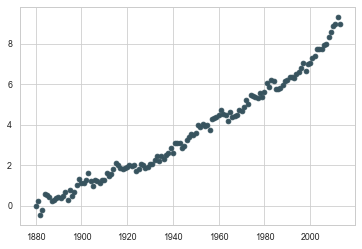

<Figure size 864x288 with 0 Axes>

In [4]:
fig,ax = plt.subplots()
plt.figure(figsize= (12,4))
ax.scatter(x = 'Year',y = 'CSIRO Adjusted Sea Level', data = d)

### Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [5]:
x = d['Year']
y = d['CSIRO Adjusted Sea Level']

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [7]:
x1 = list(range(1880, 2050))
y1 = []
for i in x1:
    y1.append(intercept + slope*i)

Text(0.5, 1.0, 'Rise in Sea Level')

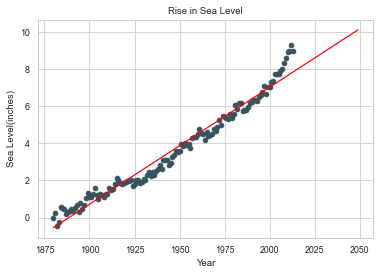

In [8]:
plt.scatter(x, y, label = 'Best Line Fit 1')
plt.plot(x1, y1, 'r', label = 'Best Line Fit 1')
plt.xlabel('Year')
plt.ylabel('Sea Level(inches)')
plt.title('Rise in Sea Level')

### Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

In [9]:
x2 = d[d['Year']>=2000]['Year']
y2 = d[d['Year']>=2000]['CSIRO Adjusted Sea Level']

In [10]:
newfit = stats.linregress(x2,y2)
newintercept = newfit.intercept
newslope = newfit.slope

In [11]:
x3 = list(range(2000, 2050))
y3 = []
for i in x3:
    y3.append(newintercept + newslope * i)

Text(0.5, 1.0, 'Rise in Sea Level')

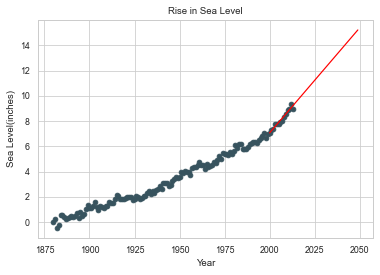

In [12]:
plt.scatter(x,y)
plt.plot(x3,y3,'r',label = 'Best Line Fit 2')
plt.xlabel('Year')
plt.ylabel('Sea Level(inches)')
plt.title('Rise in Sea Level')